In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
sns.set_style('white')
import seaborn as sns
import time
from pickle import load

import math
import os
from matplotlib.ticker import MultipleLocator
import matplotlib

In [2]:
k = 8
J = 32

Done for the non-climate change experiment.

# Load data #

In [3]:
truth_set_full = np.load("../../data/truth_run/f_20_all.npy")

polynomial_data = np.load("../../data/simulation_runs/polynomial_param/f_20_all.npy")

rnn_full = np.load("../../data/simulation_runs/rnn/rnn_final/f_20_data/f_20_all.npy")


gan_full = np.load("../../data/simulation_runs/gan_gagne/corrected_gans/f_20_all.npy")

# Create plots #

In [4]:
#PCA / EOF analysis
from sklearn.decomposition import PCA

In [5]:
#smoothing data temporally
from scipy.ndimage import uniform_filter1d

In [6]:
smoothed_data = uniform_filter1d(truth_set_full,size=80,axis=0)

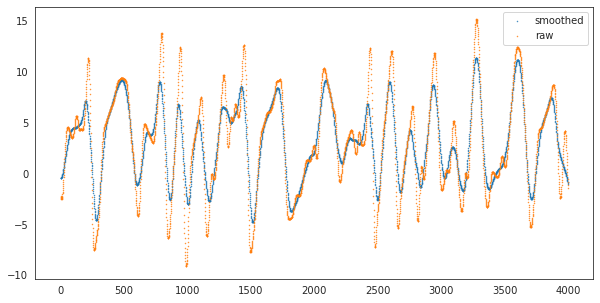

In [13]:
fig,ax = plt.subplots(figsize=(10,5),nrows=1,ncols=1)
ax.scatter(np.arange(0,4000),smoothed_data[:4000,1],s=0.2,label="smoothed")
ax.scatter(np.arange(0,4000),truth_set_full[:4000,1],s=0.2,label="raw")
ax.legend()

In [7]:
pca_smooth = PCA(n_components=4)
pca_data_smooth = pca_smooth.fit_transform(smoothed_data)

In [12]:
pca_smooth.explained_variance_ratio_ # matches paper

array([0.34352726, 0.34289687, 0.07218644, 0.07195612])

In [17]:
#(pca_data_smooth[0,0]**2 + pca_data_smooth[0,1]**2)**0.5

13.279498901276174

In [22]:
#np.linalg.norm((pca_smooth.components_[0]*pca_data_smooth[0,0]) +(pca_smooth.components_[1]*pca_data_smooth[0,1]) )

13.279498901276176

In [14]:
dim1 = (pca_data_smooth[:,0]**2 + pca_data_smooth[:,1]**2)**0.5
dim2 = (pca_data_smooth[:,2]**2 + pca_data_smooth[:,3]**2)**0.5

In [15]:
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki, key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in range(N+1)]
    # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [16]:
discretized_jet = cmap_discretize(matplotlib.cm.turbo, 15)


### Comparing across models ###

In [17]:
#poly (with already trained pca components)
smoothed_data_poly = uniform_filter1d(polynomial_data[:,:],size=80,axis=0)
pca_data_smooth_poly = pca_smooth.transform(smoothed_data_poly)

dim1_poly = (pca_data_smooth_poly[:,0]**2 + pca_data_smooth_poly[:,1]**2)**0.5
dim2_poly = (pca_data_smooth_poly[:,2]**2 + pca_data_smooth_poly[:,3]**2)**0.5

In [18]:
#rnn
smoothed_data_rnn = uniform_filter1d(rnn_full[:,:],size=80,axis=0)
pca_data_smooth_rnn = pca_smooth.transform(smoothed_data_rnn)

dim1_rnn = (pca_data_smooth_rnn[:,0]**2 + pca_data_smooth_rnn[:,1]**2)**0.5
dim2_rnn = (pca_data_smooth_rnn[:,2]**2 + pca_data_smooth_rnn[:,3]**2)**0.5

In [19]:
#gan

smoothed_data_gan = uniform_filter1d(gan_full[:,:],size=80,axis=0)
pca_data_smooth_gan = pca_smooth.transform(smoothed_data_gan)

dim1_gan = (pca_data_smooth_gan[:,0]**2 + pca_data_smooth_gan[:,1]**2)**0.5
dim2_gan = (pca_data_smooth_gan[:,2]**2 + pca_data_smooth_gan[:,3]**2)**0.5


In [20]:
import matplotlib as mpl


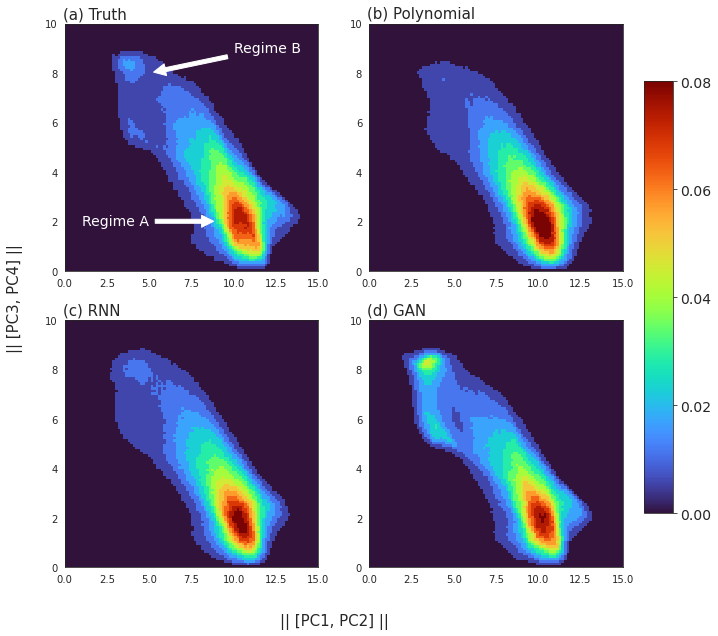

In [21]:
#recreating fig 7b / 8a
fig,ax = plt.subplots(figsize=(10,10),nrows=2,ncols=2)

plt.rcParams['font.size'] = '14'

ax[0,0].hist2d(x=dim1,y=dim2,bins=100,cmap=discretized_jet,density=True,vmax=0.08,range=[[0,15],[0,10]])
ax[0,0].text(-0.1,10.7,"(a) Truth",fontsize=15,va="top")
ax[0,0].annotate('Regime A', color="white", xy=(9, 2),  xycoords='data',
            xytext=(5,2), arrowprops=dict(facecolor='white', shrink=0.05),
            horizontalalignment='right',verticalalignment='center',
            )

ax[0,0].annotate('Regime B', color="white", xy=(5, 8),  xycoords='data',
            xytext=(12,9), arrowprops=dict(facecolor='white', shrink=0.05),
            horizontalalignment='center',verticalalignment='center',
            )

ax[0,1].hist2d(x=dim1_poly,y=dim2_poly,bins=100,cmap=discretized_jet,density=True,vmax=0.08,range=[[0,15],[0,10]])
ax[0,1].text(-0.1,10.7,"(b) Polynomial",fontsize=15,va="top")


ax[1,0].hist2d(x=dim1_rnn,y=dim2_rnn,bins=100,cmap=discretized_jet,density=True,vmax=0.08,range=[[0,15],[0,10]])
ax[1,0].text(-0.1,10.7,"(c) RNN",fontsize=15,va="top")


ax[1,1].hist2d(x=dim1_gan,y=dim2_gan,bins=100,cmap=discretized_jet,density=True,vmax=0.08,range=[[0,15],[0,10]])
ax[1,1].text(-0.1,10.7,"(d) GAN",fontsize=15,va="top")



norm = mpl.colors.Normalize(vmin=0,vmax=0.08)
sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
sm.set_array([])
cax = fig.add_axes([0.93,0.2,0.04,0.6])
fig.colorbar(sm, ticks=[0,0.02,0.04,0.06,0.08],cax=cax)

fig.text(0.5, 0.045, '|| [PC1, PC2] ||', ha='center', fontsize="15")
fig.text(0.045, 0.5, '|| [PC3, PC4] ||', va='center', rotation='vertical',fontsize="15")

plt.savefig("regime_plots.pdf",bbox_inches="tight")


plt.show()

In [22]:
pca_true_density,_,_,_  = plt.hist2d(x=dim1,y=dim2,bins=100,cmap=discretized_jet,density=True,vmax=0.08,range=[[0,15],[0,10]])
pca_poly_density,_,_,_  = plt.hist2d(x=dim1_poly,y=dim2_poly,bins=100,cmap=discretized_jet,density=True,vmax=0.08,range=[[0,15],[0,10]]);
pca_rnn_density,_,_,_  = plt.hist2d(x=dim1_rnn,y=dim2_rnn,bins=100,cmap=discretized_jet,density=True,vmax=0.08,range=[[0,15],[0,10]])
pca_gan_density,_,_,_  = plt.hist2d(x=dim1_gan,y=dim2_gan,bins=100,cmap=discretized_jet,density=True,vmax=0.08,range=[[0,15],[0,10]])
plt.close()

In [23]:
pca_true_density = pca_true_density + 1e-10
pca_poly_density = pca_poly_density + 1e-10

pca_rnn_density = pca_rnn_density + 1e-10
pca_gan_density = pca_gan_density + 1e-10

In [24]:
#kl between poly and true
np.sum(np.log(pca_true_density/pca_poly_density)*pca_true_density)


3.924487970929687

In [25]:
#kl between rnn and true
np.sum(np.log(pca_true_density/pca_rnn_density)*pca_true_density)


1.829454517146566

In [26]:
#kl between gan and true
np.sum(np.log(pca_true_density/pca_gan_density)*pca_true_density)


11.564703941558072

In [31]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0],[0],color="#4daf4a",lw=4,label="Truth"),
                    Line2D([0],[0],color="#e41a1c",lw=2,label="Polynomial"),
                  Line2D([0],[0],color="#377eb8",lw=2,label="RNN"),
                  Line2D([0],[0],color="#984ea3",lw=2,label="GAN")]

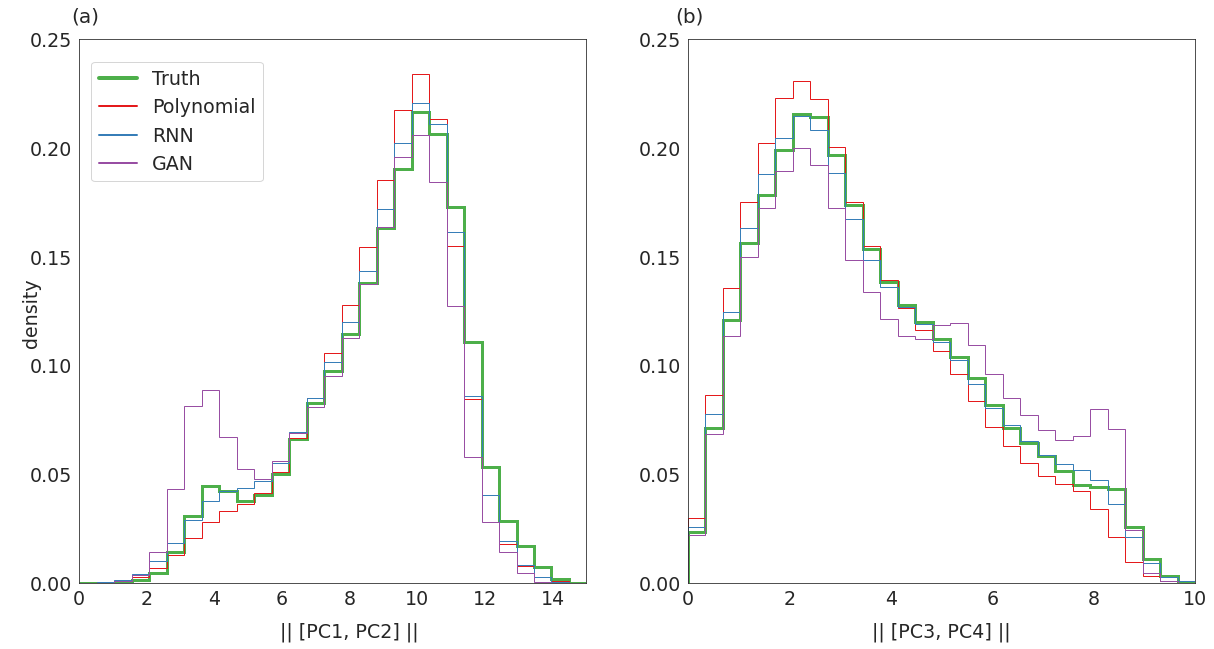

In [33]:
#fig 10a

bin_seq = np.linspace(0,15,30)
bin_seq2 = np.linspace(0,10,30)


fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

plt.rcParams['font.size'] = '19'


ax[0].hist(np.ravel(dim1),bins=bin_seq,color="#4daf4a",density=True,histtype="step",linewidth=3)
ax[0].hist(np.ravel(dim1_poly[:]),bins=bin_seq,color="#e41a1c",density=True,histtype="step")
ax[0].hist(np.ravel(dim1_rnn[:]),bins=bin_seq,color="#377eb8",density=True,histtype="step")
ax[0].hist(np.ravel(dim1_gan[:]),bins=bin_seq,color="#984ea3",density=True,histtype="step")

ax[1].hist(np.ravel(dim2[:]),bins=bin_seq2,color="#4daf4a",density=True,histtype="step",linewidth=3)
ax[1].hist(np.ravel(dim2_poly[:]),bins=bin_seq2,color="#e41a1c",density=True,histtype="step")
ax[1].hist(np.ravel(dim2_rnn[:]),bins=bin_seq2,color="#377eb8",density=True,histtype="step")
ax[1].hist(np.ravel(dim2_gan[:]),bins=bin_seq2,color="#984ea3",density=True,histtype="step")



ax[0].text(8, -0.025, '|| [PC1, PC2] ||', ha='center', fontsize="19")
ax[1].text(5, -0.025, '|| [PC3, PC4] ||', ha='center', fontsize="19")

ax[0].text(-0.249,0.265,"(a)",fontsize=20,va="top")
ax[1].text(-0.249,0.265,"(b)",fontsize=20,va="top")

fig.legend(handles=legend_elements,loc=(0.075,0.72),prop={"size":19})

fig.text(0.085, 0.5, 'density', va='center', rotation='vertical',fontsize="19")

ax[0].set_xlim([0,15])
ax[0].set_ylim([0,0.25])

ax[1].set_xlim([0,10])
ax[1].set_ylim([0,0.25])



plt.savefig("non_clim_change_regime_hists.pdf",bbox_inches="tight")


plt.show()

In [39]:
fig,ax = plt.subplots()
bin_seq = np.linspace(0,15,30)

y_true,_,_ = ax.hist(np.ravel(dim1),bins=bin_seq,color="grey",density=True,histtype="step")
y_poly,_,_ = ax.hist(np.ravel(dim1_poly),bins=bin_seq,color="red",density=True,histtype="step")
y_rnn,_,_ = ax.hist(np.ravel(dim1_rnn),bins=bin_seq,color="blue",density=True,histtype="step")
y_gan,_,_ = ax.hist(np.ravel(dim1_gan),bins=bin_seq,color="blue",density=True,histtype="step")
plt.close()


In [40]:
#deal with numerical stuff due to y_true containing zero
y_true = y_true + 1e-10
y_rnn = y_rnn + 1e-10
y_poly = y_poly + 1e-10
y_gan = y_gan + 1e-10


In [41]:
#kl between poly and true
np.sum(np.log(y_true/y_poly)*y_true)


0.03193276337299856

In [42]:
#kl between rnn and true
np.sum(np.log(y_true/y_rnn)*y_true)


0.023545225971951807

In [43]:
#kl between gan and true
np.sum(np.log(y_true/y_gan)*y_true)

#sometimes need to run again to get these kl in the correct order (i.e. rnn best)

0.1408059864806846

In [44]:
fig,ax = plt.subplots()

bin_seq2 = np.linspace(0,10,30)

y_true2,_,_ = ax.hist(np.ravel(dim2),bins=bin_seq2,color="grey",density=True,histtype="step")
y_poly2,_,_ = ax.hist(np.ravel(dim2_poly),bins=bin_seq2,color="red",density=True,histtype="step")
y_rnn2,_,_ = ax.hist(np.ravel(dim2_rnn),bins=bin_seq2,color="blue",density=True,histtype="step")
y_gan2,_,_ = ax.hist(np.ravel(dim2_gan),bins=bin_seq2,color="blue",density=True,histtype="step")

plt.close()

In [45]:
#deal with numerical stuff due to y_true containing zero
y_true2 = y_true2 + 1e-10
y_rnn2 = y_rnn2 + 1e-10
y_poly2 = y_poly2 + 1e-10
y_gan2 = y_gan2 + 1e-10


In [46]:
#kl between poly and true
np.sum(np.log(y_true2/y_poly2)*y_true2)


0.0398411758072558

In [47]:
#kl between rnn and true
np.sum(np.log(y_true2/y_rnn2)*y_true2)


0.003507373674401216

In [48]:
#kl between gan and true
np.sum(np.log(y_true2/y_gan2)*y_true2)


0.045397237560581935